In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
def MT(X_train, X_test, y_test):
    # 標準化
    sc = StandardScaler()
    X_std = sc.fit_transform(X_train)
    
    # 標準化したXの相関係数行列
    X_std_corr = np.corrcoef(X_std, rowvar=False)
    
    # 逆行列の計算
    X_std_corr_inv = np.linalg.inv(X_std_corr) 
    
    # テスト
    X_test_std = sc.transform(X_test)
    X_test_dist = np.array([np.dot(x, np.dot(X_std_corr_inv, x)) for x in X_test_std])/X_test.shape[1]
    
    # 描画
    plt.plot(np.where(y_test==0)[0], X_test_dist[np.where(y_test==0)[0]], 'o', alpha=.5)
    plt.plot(np.where(y_test!=0)[0], X_test_dist[np.where(y_test!=0)[0]], 'o', color='r',  alpha=.5)
    plt.show()

    return X_test_dist 

In [3]:
def break_even(a, y_test):
    y_test.reset_index(drop=True, inplace=True) # インデックスリセット
    idx = a.argsort()[::-1] # 降順のインデックス計算

    n_total = len(y_test)
    n_anom = sum(y_test)
    n_norm = n_total - n_anom
    coverage = np.zeros(n_total) # 異常網羅率
    detection = np.zeros(n_total) # 正答率
    for i in range(n_total):
        n_detected_anom = sum(y_test[idx][:i])
        n_detected_norm = n_total - i - sum(y_test[idx][i:])
        coverage[i] = n_detected_anom / n_anom
        detection[i] = n_detected_norm / n_norm

    # プロット
    plt.plot(a[idx], coverage, label='coverage')
    plt.plot(a[idx], detection, label='detection ratio')
    plt.xlabel('threshold')
    plt.xscale('log')
    plt.legend()
    plt.show()

# iris

In [4]:
# ファイル読み込み
in_file = '../data/iris.csv'
df = pd.read_csv(in_file, header=0, index_col=None, sep=',')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


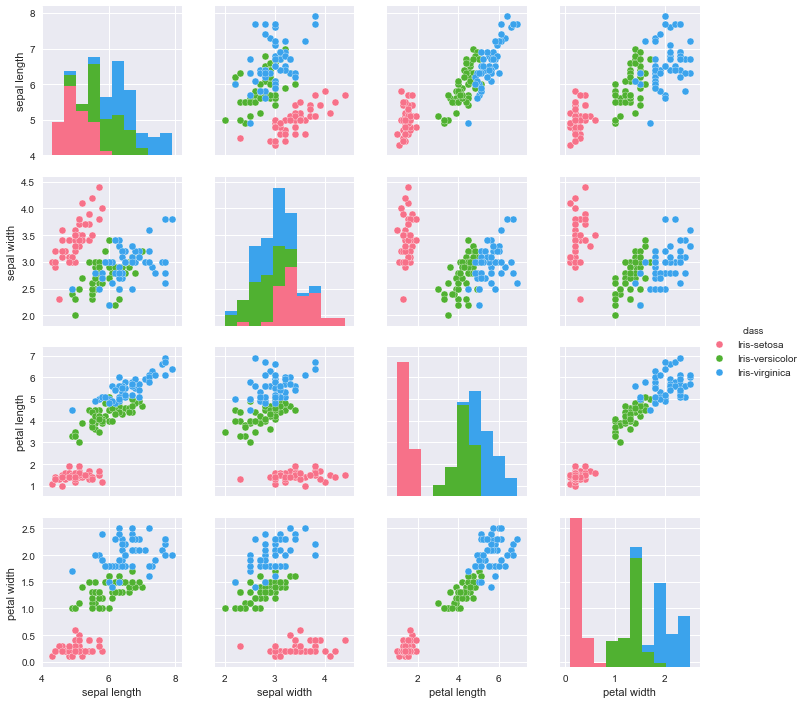

In [7]:
# 各特徴量で散布図作成
sns.pairplot(df, hue='class', palette='husl');
plt.show()

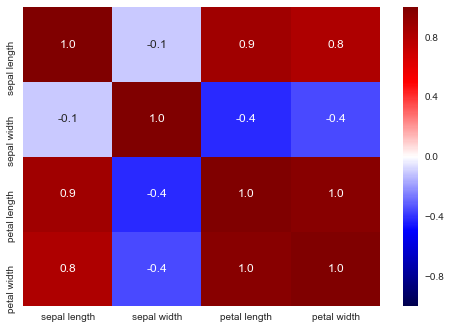

In [8]:
# 相関の確認
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat,
            cmap='seismic',
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

## Iris-virginicaの検出

In [9]:
# データセットの作成
target = 'Iris-virginica'
df_nontarget = df[df['class']!=target]
X_train = df_nontarget.drop('class', axis=1)
y_train = (df_nontarget['class']!=target).astype(np.int32)
X_test = df.drop('class', axis=1)
y_test = (df['class']==target).astype(np.int32)

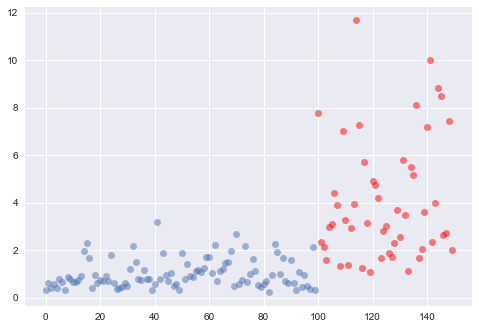

In [10]:
a = MT(X_train, X_test, y_test)

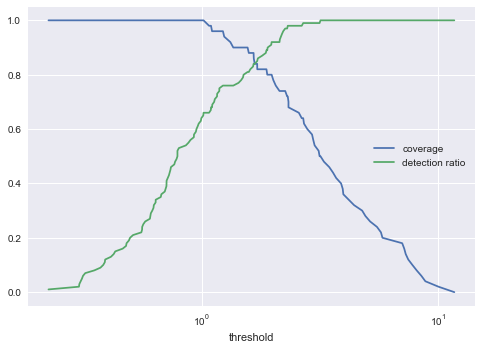

In [11]:
break_even(a, y_test)

## setosa の検出

In [12]:
# データセットの作成
target = 'Iris-setosa'
df_nontarget = df[df['class']!=target]
X_train = df_nontarget.drop('class', axis=1)
y_train = (df_nontarget['class']!=target).astype(np.int32)
X_test = df.drop('class', axis=1)
y_test = (df['class']==target).astype(np.int32)

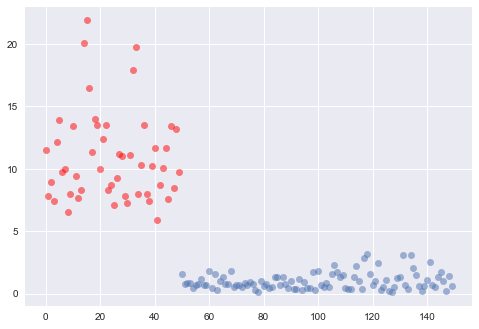

In [13]:
a = MT(X_train, X_test, y_test)

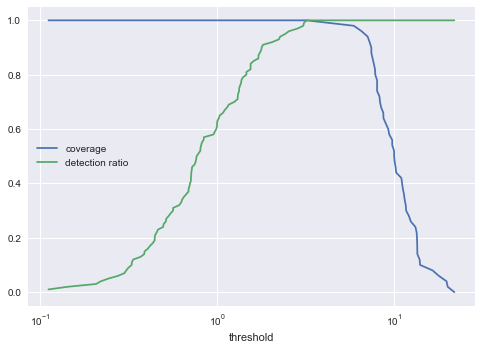

In [14]:
break_even(a, y_test)

## versicolor の検出

In [15]:
# データセットの作成
target = 'Iris-versicolor'
df_nontarget = df[df['class']!=target]
X_train = df_nontarget.drop('class', axis=1)
y_train = (df_nontarget['class']!=target).astype(np.int32)
X_test = df.drop('class', axis=1)
y_test = (df['class']==target).astype(np.int32)

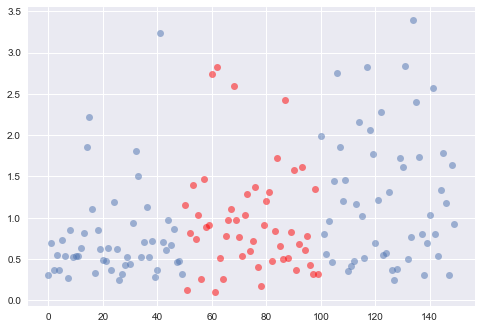

In [16]:
a = MT(X_train, X_test, y_test)

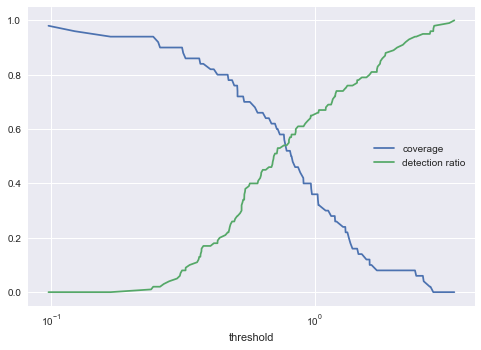

In [17]:
break_even(a, y_test)

#  breast_cancer

In [18]:
# ファイル読み込み
in_file = '../data/breast_cancer.csv'
df = pd.read_csv(in_file, header=0, index_col='Sample code number', sep=',')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


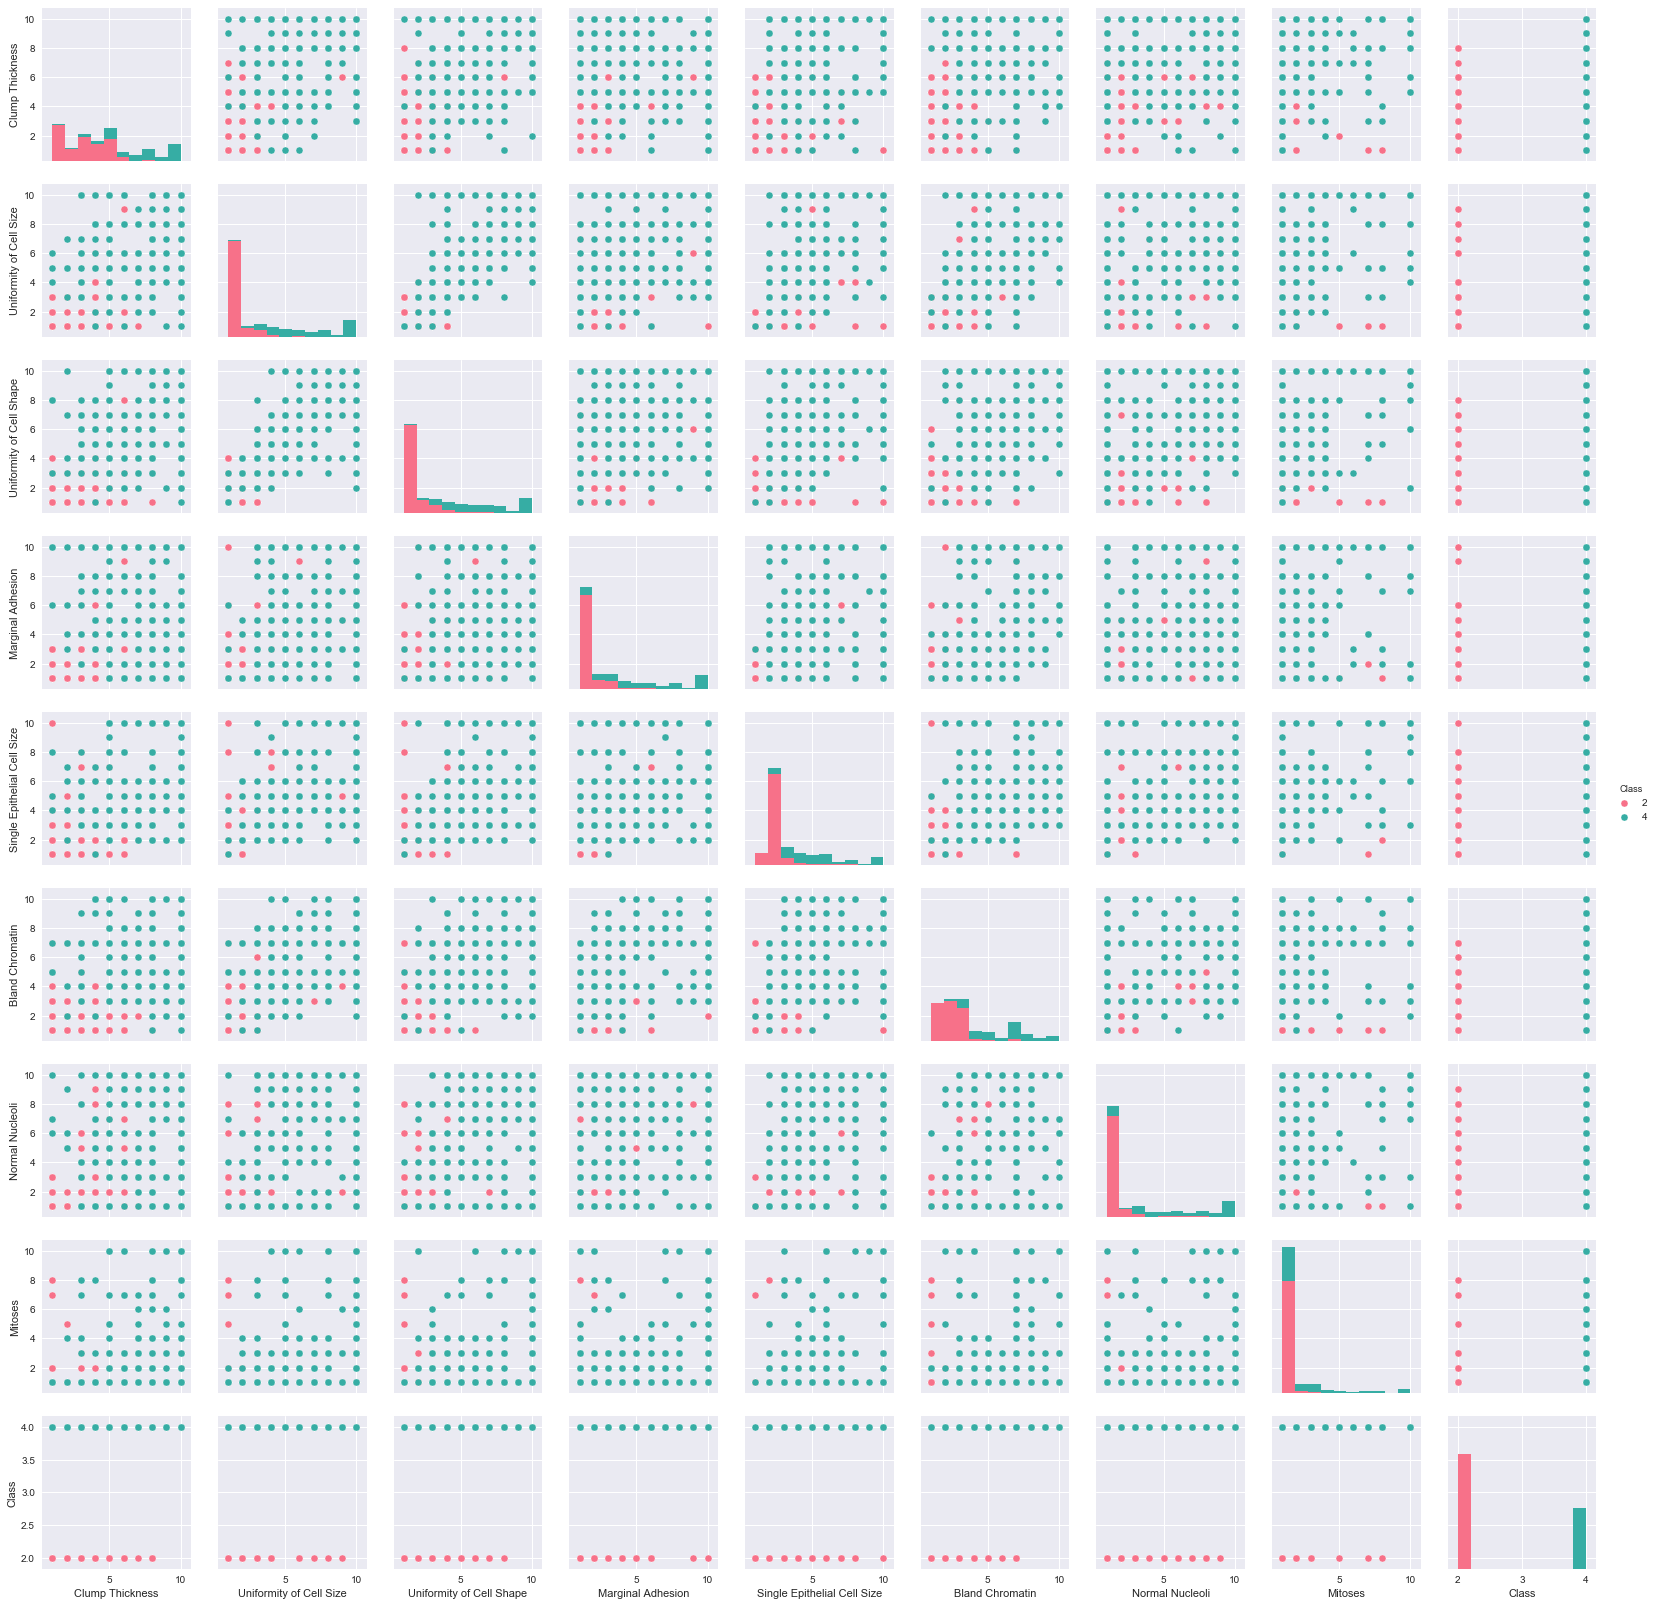

In [21]:
# 各特徴量で散布図作成
sns.pairplot(df, hue='Class', palette='husl');
plt.show()

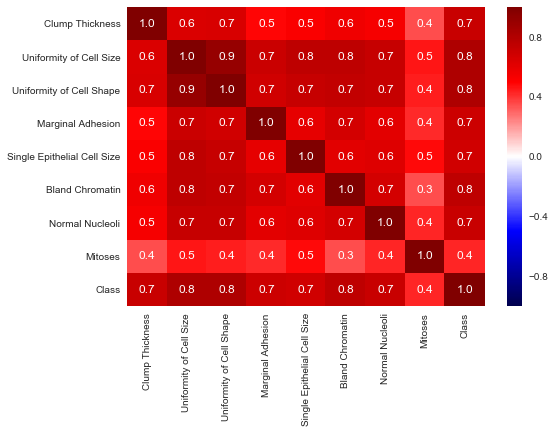

In [22]:
# 相関の確認
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat,
            cmap='seismic',
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [23]:
# データセットの作成
target = 4
df = df.replace('?', np.nan)
df = df.dropna(how='any', axis=1)
df_nontarget = df[df['Class']!=target]
X_train = df_nontarget.drop('Class', axis=1)
y_train = (df_nontarget['Class']!=target).astype(np.int32)
X_test = df.drop('Class', axis=1)
y_test = (df['Class']==target).astype(np.int32)

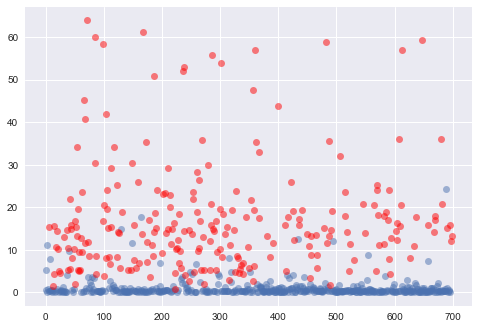

In [24]:
a = MT(X_train, X_test, y_test)

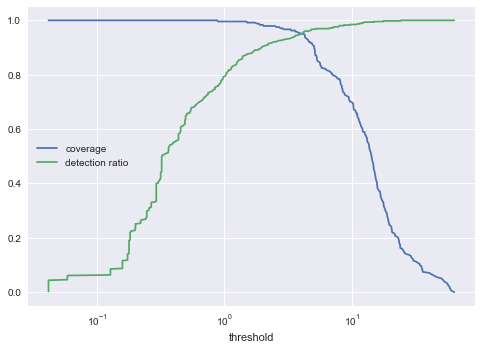

In [25]:
break_even(a, y_test)

# breast_cancer_coimbra

In [26]:
# ファイル読み込み
in_file = '../data/breast_cancer_coimbra.csv'
df = pd.read_csv(in_file, header=0, index_col=None, sep=',')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [27]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.1 KB


In [29]:
# クロス集計
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

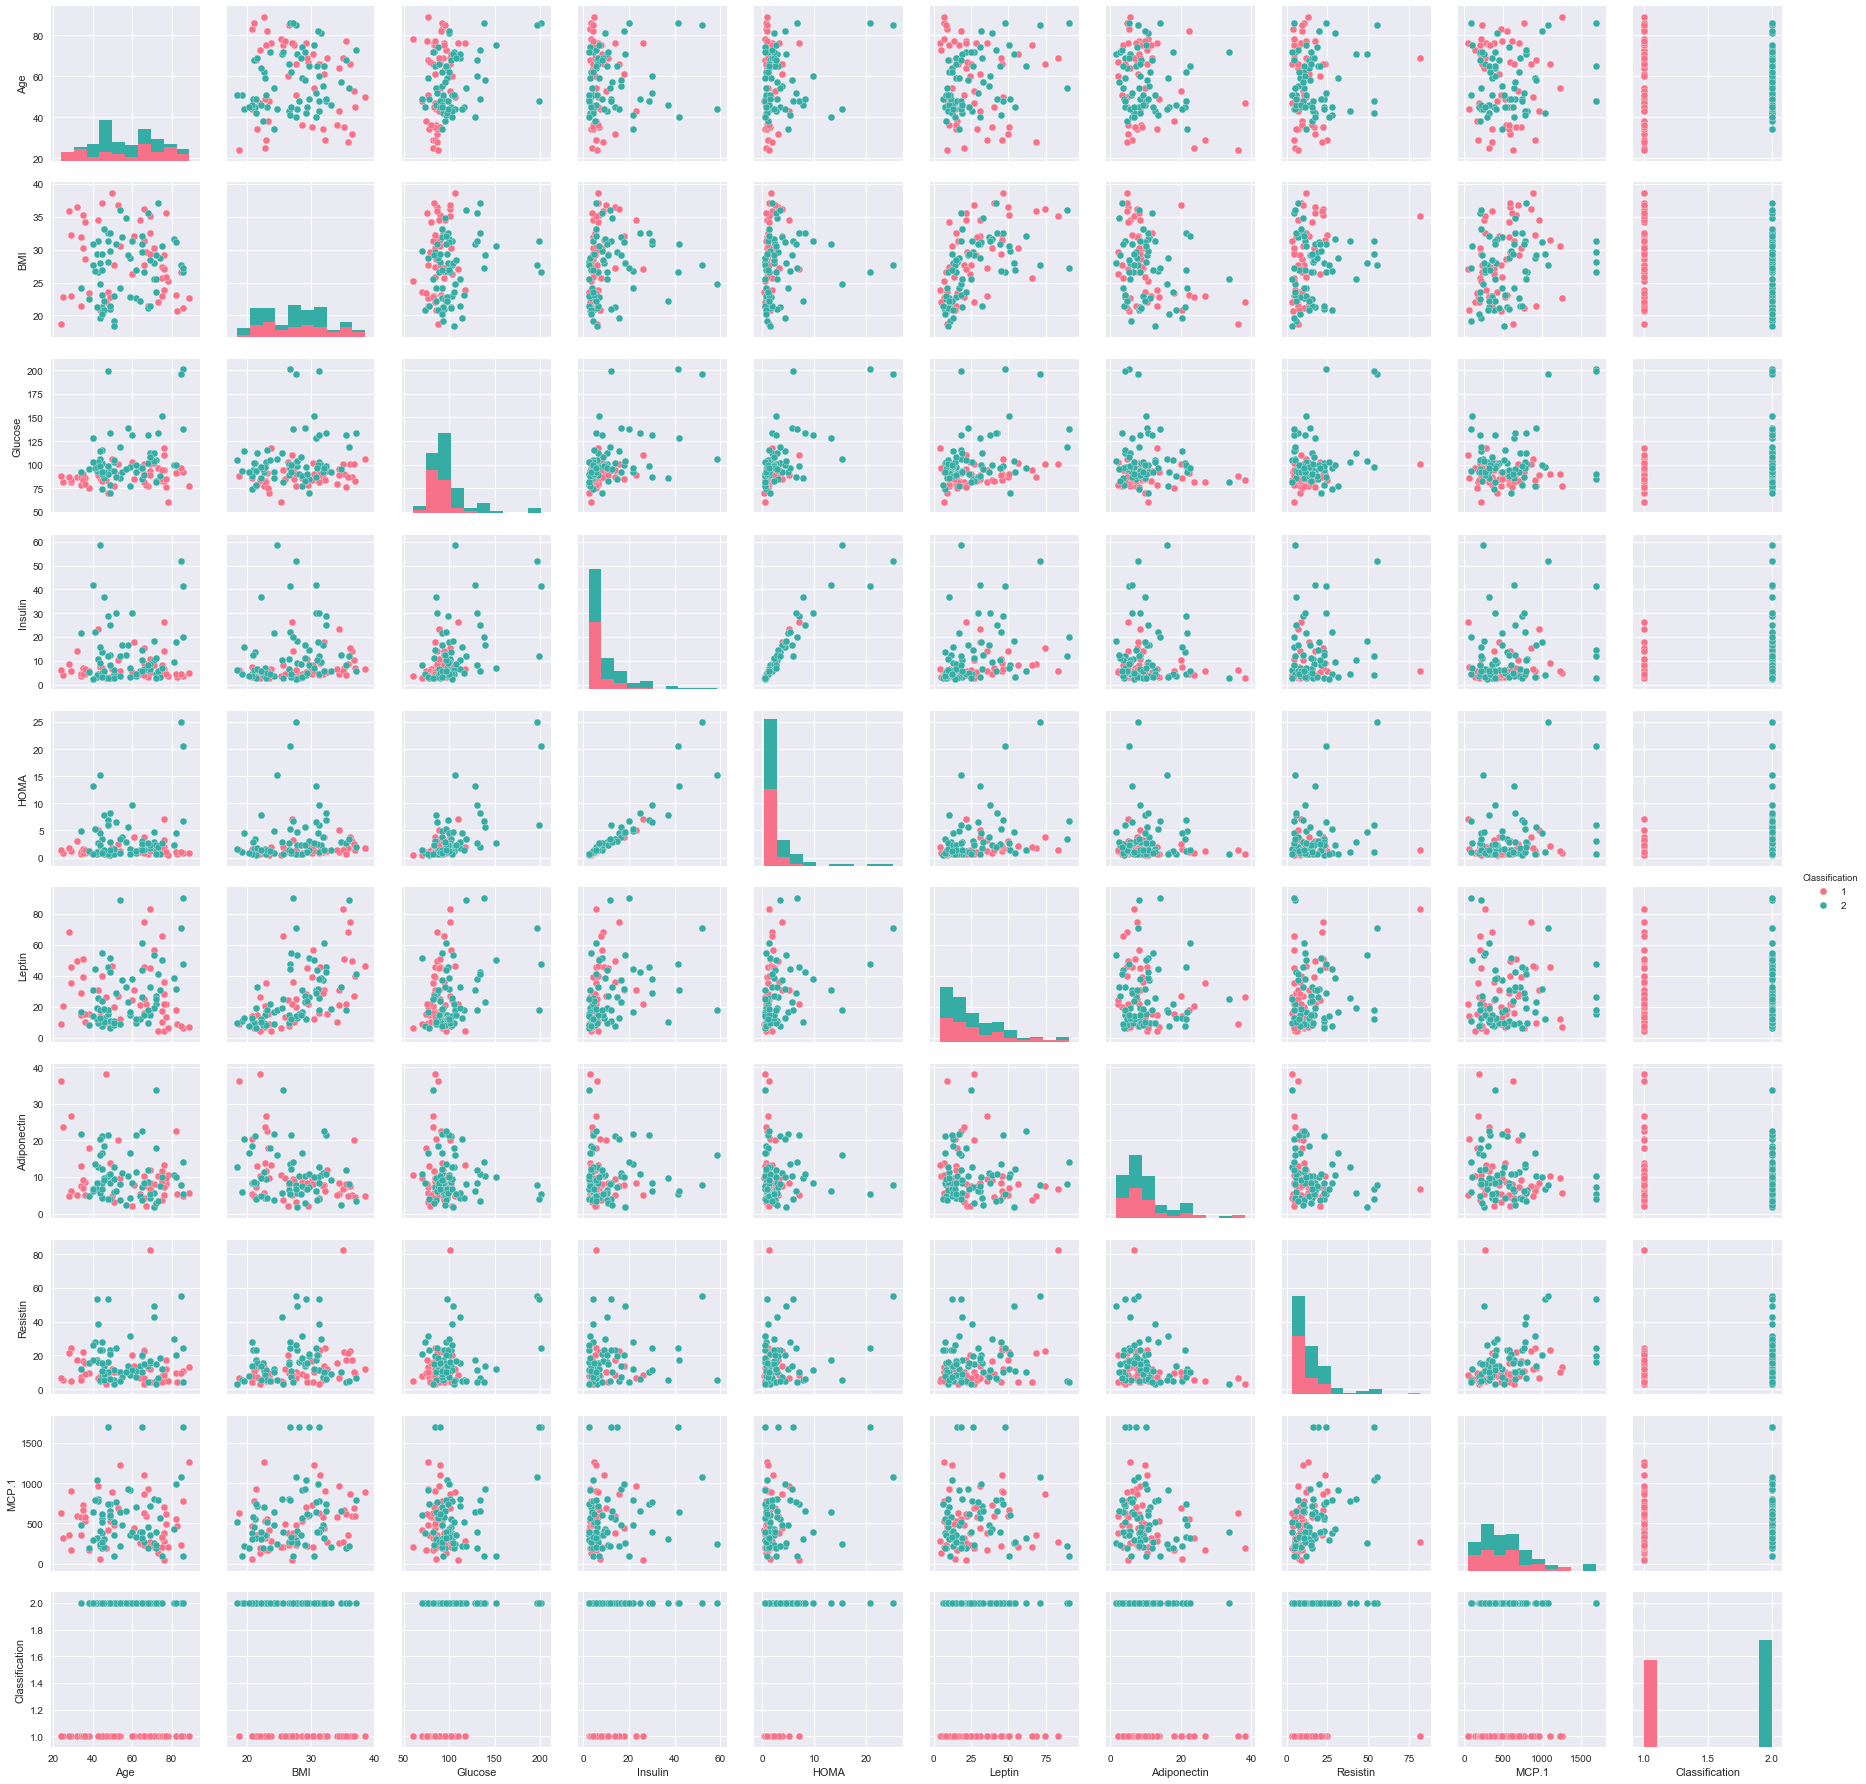

In [30]:
# 各特徴量で散布図作成
sns.pairplot(df, hue='Classification', palette='husl');
plt.show()

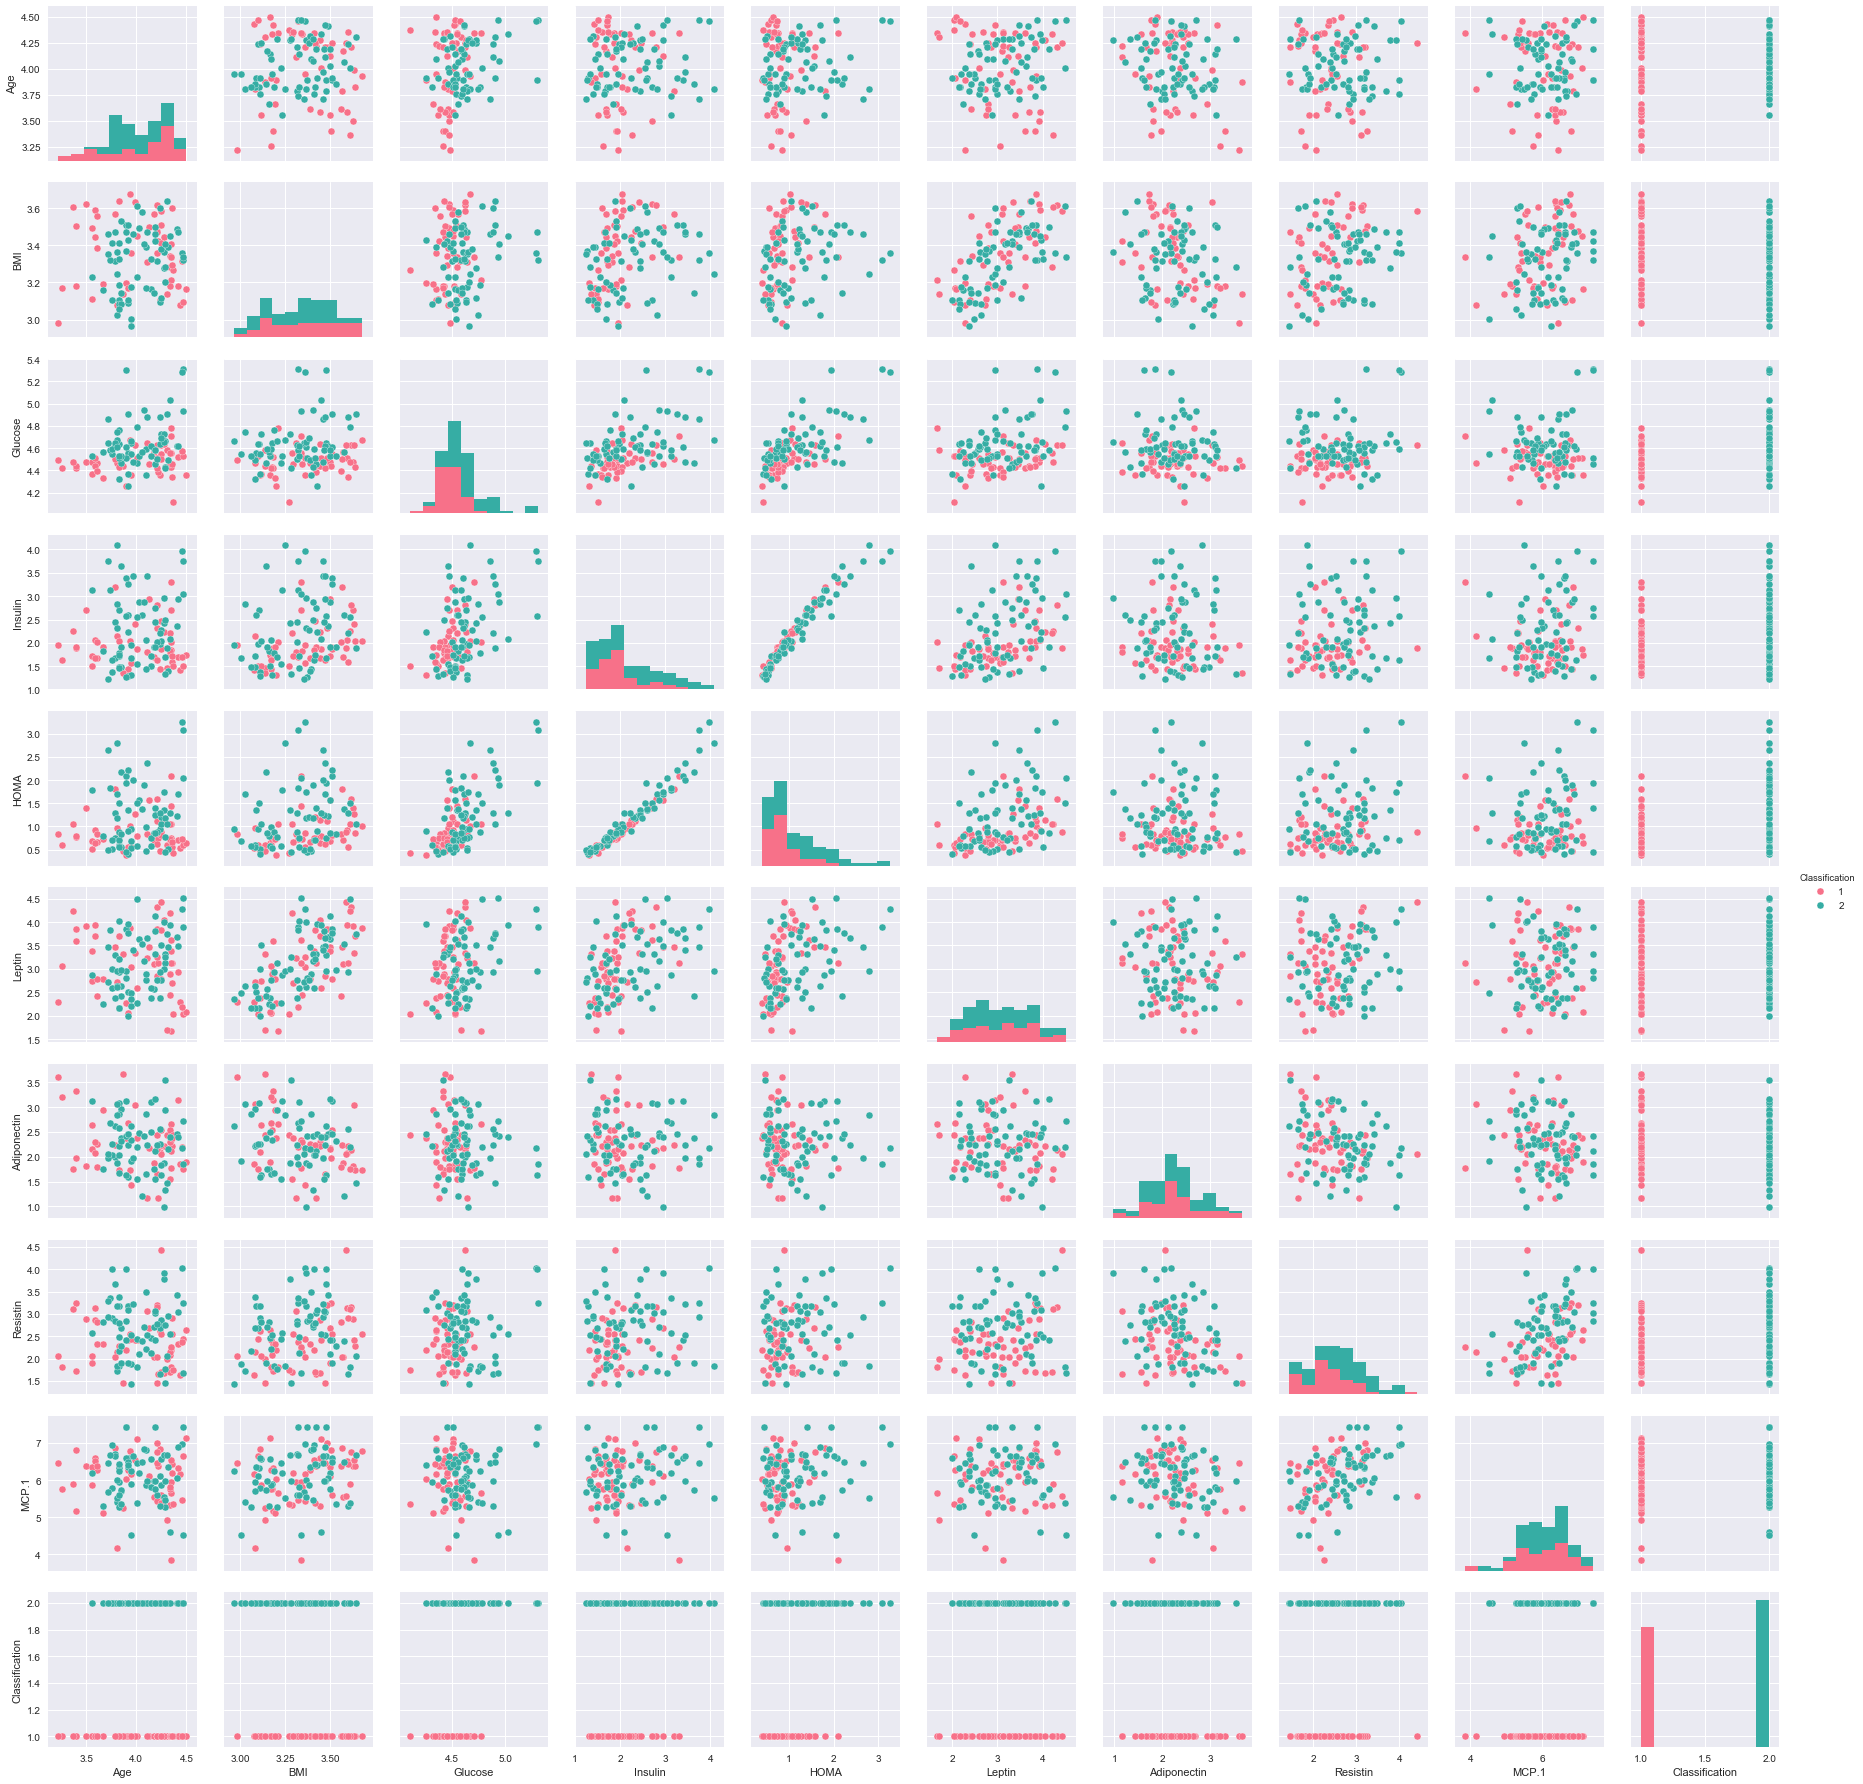

In [31]:
# 各特徴量で散布図作成
# Box-Cox
df_boxcox = np.log(df.drop('Classification', axis=1)+1)
df_boxcox = pd.concat([df_boxcox, df['Classification']], axis=1)
sns.pairplot(df_boxcox, hue='Classification', palette='husl');
plt.show()

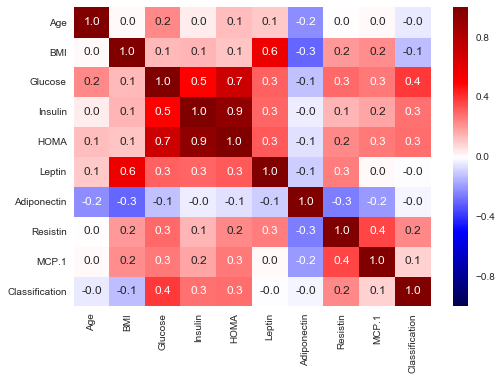

In [32]:
# 相関の確認
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat,
            cmap='seismic',
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [33]:
# データセットの作成
target = 2
df_nontarget = df[df['Classification']!=target]
X_train = df_nontarget.drop('Classification', axis=1)
y_train = (df_nontarget['Classification']!=target).astype(np.int32)
X_test = df.drop('Classification', axis=1)
y_test = (df['Classification']==target).astype(np.int32)

# Box-Cox 変換
X_train = np.log(X_train + 1)
X_test = np.log(X_test + 1)

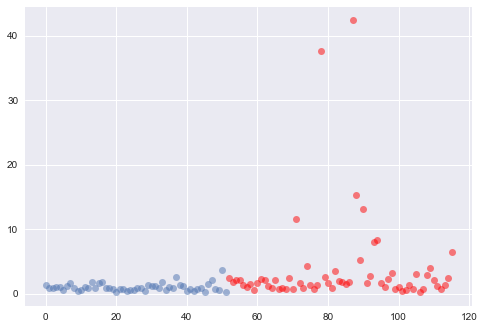

In [34]:
a = MT(X_train, X_test, y_test)

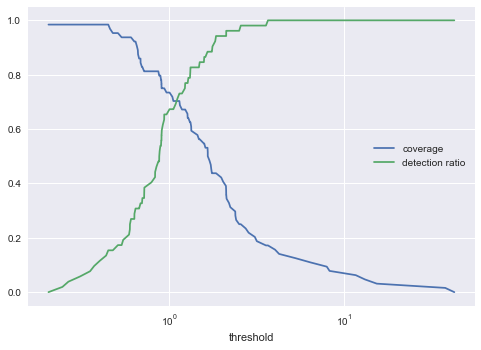

In [35]:
break_even(a, y_test)